In This Note Book We will Explore IPL Dataset and Apply Machine Learning Techniques For Predictive Analysis


In [265]:
# libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [122]:
# loading the dataset
deliveries = pd.read_csv('deliveries.csv')

# checking the first 5 rows of the dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [123]:
# getting info  about the deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [124]:
# number of rows and columns in the deliveries dataset
deliveries.shape

(260920, 17)

In [125]:
# display the values in simple notations'
pd.options.display.float_format = '{:,.2f}'.format

# check for summary statistics of the deliveries dataset
deliveries[['over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket']].describe()

,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,"260,920.00","260,920.00","260,920.00","260,920.00","260,920.00","260,920.00"
mean,9.20,3.62,1.27,0.07,1.33,0.05
std,5.68,1.81,1.64,0.34,1.63,0.22
min,0.00,1.00,0.00,0.00,0.00,0.00
25%,4.00,2.00,0.00,0.00,0.00,0.00
50%,9.00,4.00,1.00,0.00,1.00,0.00
75%,14.00,5.00,1.00,0.00,1.00,0.00
max,19.00,11.00,6.00,7.00,7.00,1.00


On an average, 9.2 overs a team played in an IPL match in which 7 maximum runs were scored in an over and maximum 1 wicket was taken in an over

In [126]:
# check for missing values in the deliveries dataset
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

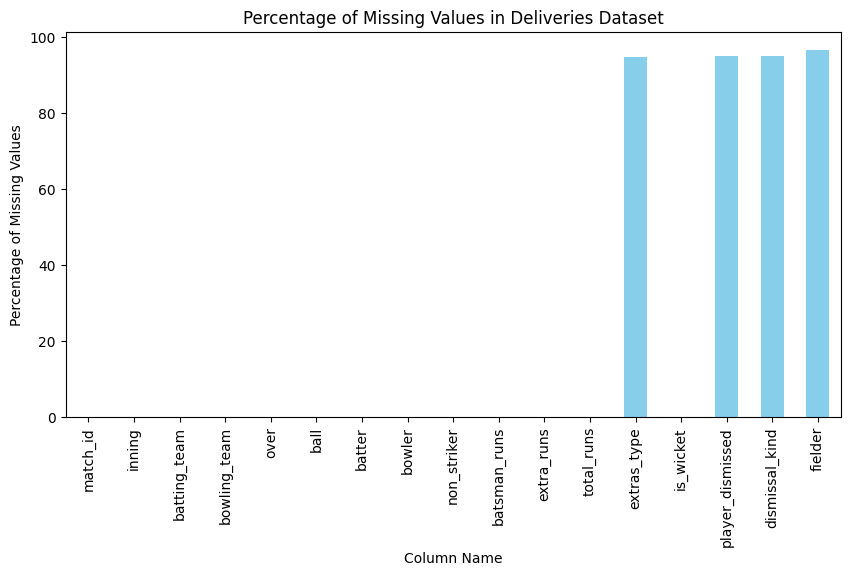

In [127]:
# checking the percentage of missing values in the deliveries dataset
missing_percentage = (deliveries.isnull().sum() / len(deliveries)) * 100
missing_percentage.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Percentage of Missing Values in Deliveries Dataset')
plt.xlabel('Column Name')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [128]:
# which player scored the most runs in all the seasons?
top_scorer = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top_scorer.sort_values(by='batsman_runs', ascending=False).head(10)

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
374,MS Dhoni,5243
30,AB de Villiers,5181
124,CH Gayle,4997
501,RV Uthappa,4954
282,KD Karthik,4843


In [129]:
# which player threw the most overs in all the seasons?
top_bowler = deliveries.groupby('bowler')['over'].count().reset_index()
top_bowler.sort_values(by='over', ascending=False).head(10)

,bowler,over
355,R Ashwin,4679
446,SP Narine,4146
71,B Kumar,4060
348,PP Chawla,3895
373,RA Jadeja,3895
524,YS Chahal,3628
163,Harbhajan Singh,3496
8,A Mishra,3444
119,DJ Bravo,3296
494,UT Yadav,3190


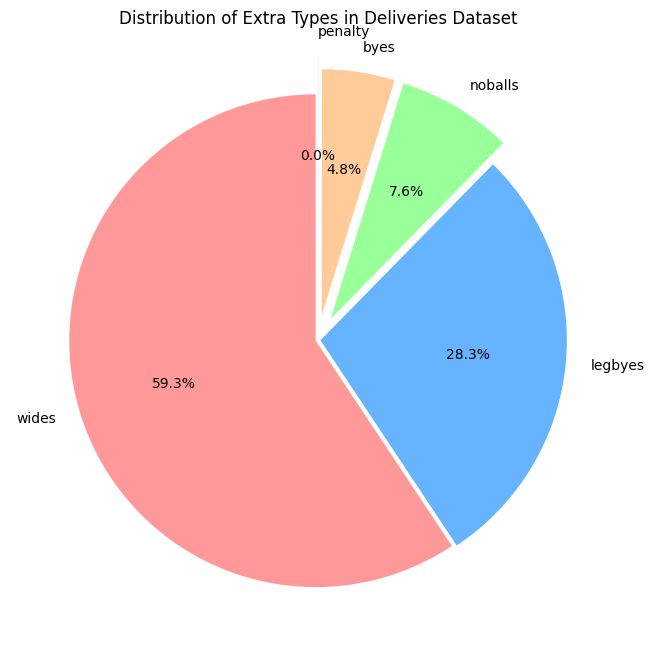

In [130]:
# most of the extra types in the deliveries dataset
extra_types = deliveries['extras_type'].value_counts().reset_index()
extra_types.columns = ['extras_type', 'count']
explode = (0.01, 0.01, 0.1, 0.1, 0.15)  # explode only the first slice

extra_types.set_index('extras_type')['count'].plot(
	kind='pie',
	autopct='%1.1f%%',
	figsize=(8, 8),
	startangle=90,
	explode=explode,
	colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
)
plt.title('Distribution of Extra Types in Deliveries Dataset')
plt.ylabel('')
plt.show()

Most of the extra types in the deliveries dataset were wides with percentage of 59.3%
Second most common extra type was legbyes with percentage of 28.3%

In [131]:
# maximum extra runs in the deliveries dataset
max_extra_runs = deliveries['extra_runs'].max()
print(f'Maximum extra runs in the deliveries dataset: {max_extra_runs}')

Maximum extra runs in the deliveries dataset: 7


In [132]:
# top 5 bowlers who dismissed the most batsmen
top_bowler_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()
top_bowler_wickets.sort_values(by='is_wicket', ascending=False).head(5)

,bowler,is_wicket
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198


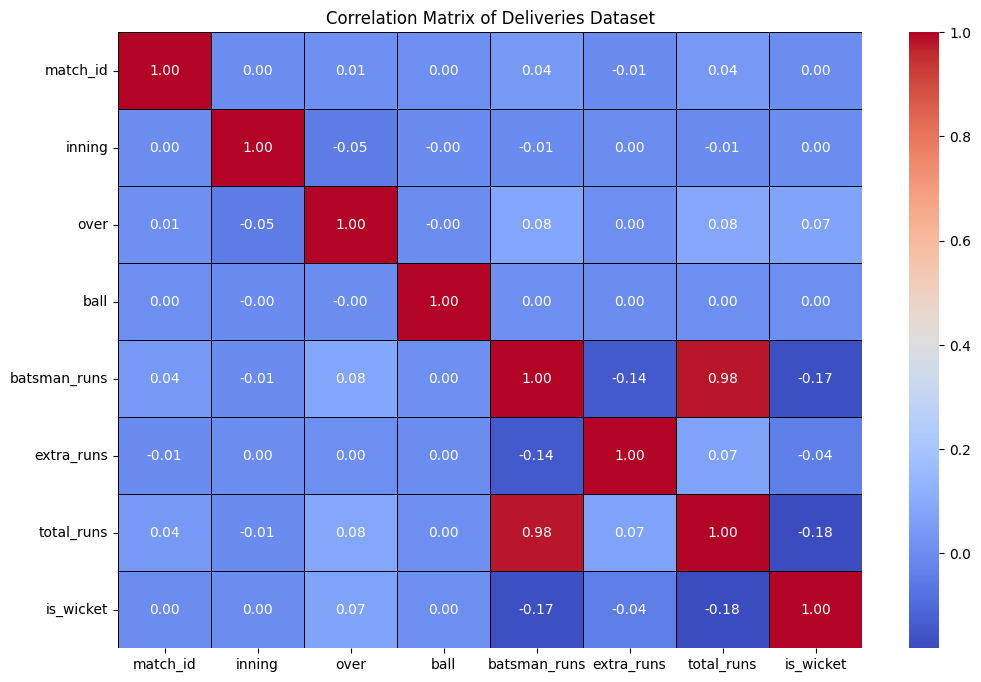

In [133]:
# correlation matrix of the deliveries dataset
plt.figure(figsize=(12, 8))
sns.heatmap(
    deliveries.corr(numeric_only=True),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Deliveries Dataset')
plt.show()


total runs and batsman runs have a strong positive correlation of 0.98 which means batesman runs are directly proportional to total runs.

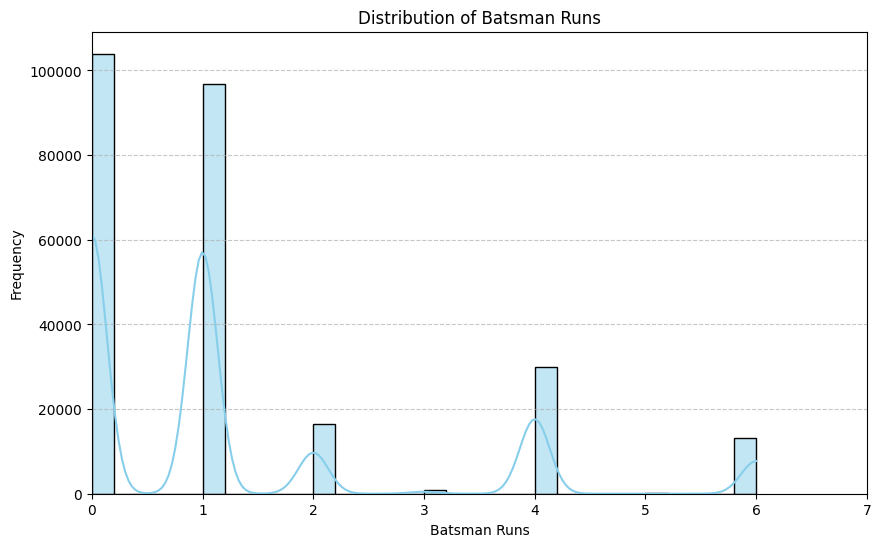

In [134]:
# plotting the distribution of batsman runs
plt.figure(figsize=(10, 6))
sns.histplot(
    deliveries['batsman_runs'],
    bins=30,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Batsman Runs')
plt.xlabel('Batsman Runs')
plt.ylabel('Frequency')
plt.xlim(0, deliveries['batsman_runs'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

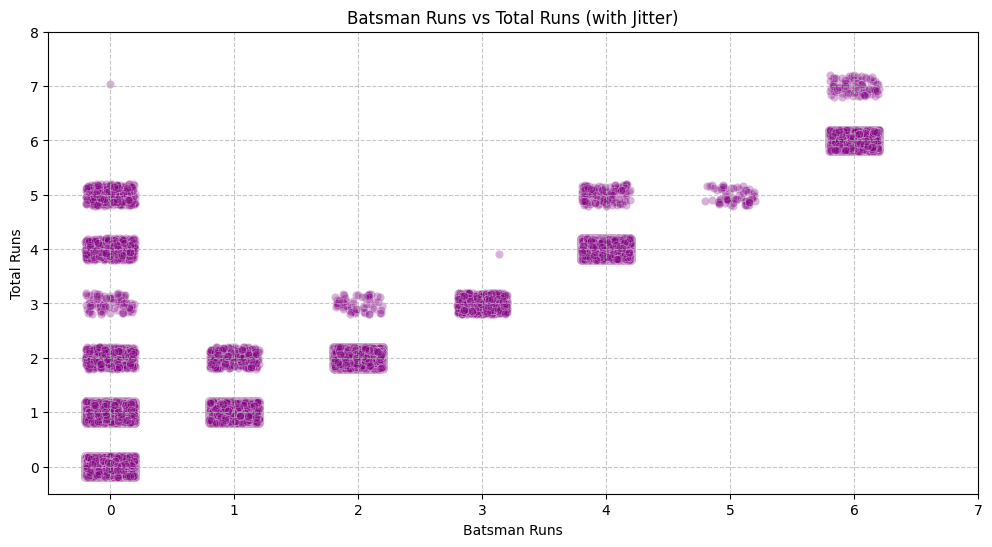

In [135]:
# Add jitter to batsman_runs and total_runs for better visualization
jitter = 0.2
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=deliveries['batsman_runs'] + np.random.uniform(-jitter, jitter, size=len(deliveries)),
    y=deliveries['total_runs'] + np.random.uniform(-jitter, jitter, size=len(deliveries)),
    alpha=0.3,
    color='purple'
)
plt.title('Batsman Runs vs Total Runs (with Jitter)')
plt.xlabel('Batsman Runs')
plt.ylabel('Total Runs')
plt.xlim(-0.5, deliveries['batsman_runs'].max() + 1)
plt.ylim(-0.5, deliveries['total_runs'].max() + 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



At zero total runs are extras  as we can see from the scatter plot of batsman runs and total runs with increasing batsman runs, total runs are also increasing.

In [136]:
# which player dismissed the most
top_batsman_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('batter')['is_wicket'].count().reset_index()
top_batsman_wickets.sort_values(by='is_wicket', ascending=False).head(5)

,batter,is_wicket
442,RG Sharma,232
584,V Kohli,218
474,S Dhawan,194
262,KD Karthik,189
463,RV Uthappa,184


RG Sharma and V Kohli have dismissed the most 

In [137]:
# check unique values in dismissal_kind column
dismissal_kinds = deliveries['dismissal_kind'].value_counts()
unique_kinds = deliveries['dismissal_kind'].dropna().unique()
print("Unique values in 'dismissal_kind' column:")
for kind, count in dismissal_kinds.items():
    print(f"{kind}: {count}")


Unique values in 'dismissal_kind' column:
caught: 8063
bowled: 2212
run out: 1114
lbw: 800
caught and bowled: 367
stumped: 358
retired hurt: 15
hit wicket: 15
obstructing the field: 3
retired out: 3


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\584637413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


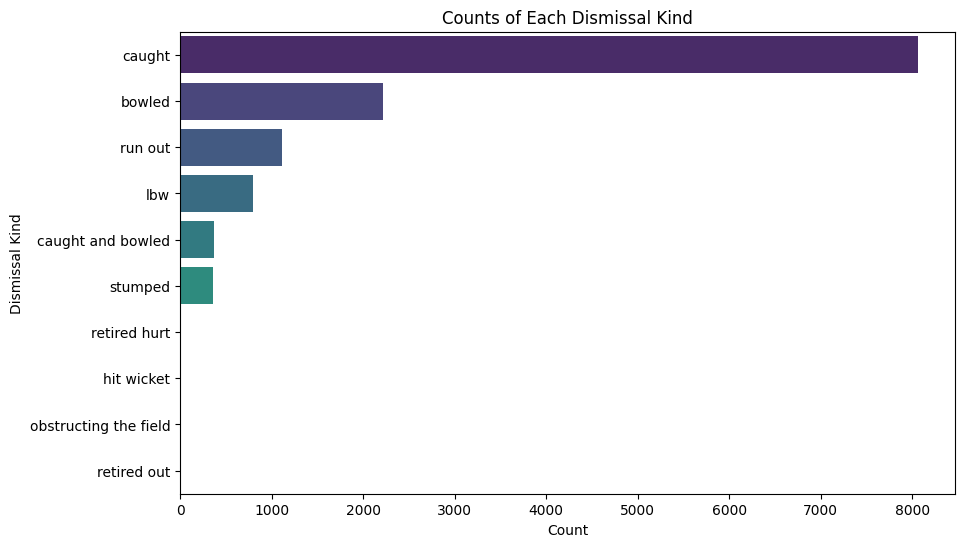

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=dismissal_kinds.values,
    y=dismissal_kinds.index,
    palette='viridis'
)
plt.title('Counts of Each Dismissal Kind')
plt.xlabel('Count')
plt.ylabel('Dismissal Kind')
plt.show()

In [140]:
# which fielder position has the most dismissals and their dismissal types

fielder_dismissals = deliveries[~deliveries['fielder'].isna()]
fielder_positions_types = (
    fielder_dismissals.groupby(['fielder', 'dismissal_kind'])
    .size()
    .reset_index(name='dismissals')
)
fielder_positions_types = fielder_positions_types[fielder_positions_types['fielder'].isin(top_fielders)]
fielder_positions_types.sort_values(['fielder', 'dismissals'], ascending=[True, False])


,fielder,dismissal_kind,dismissals
34,AB de Villiers,caught,120
35,AB de Villiers,run out,13
36,AB de Villiers,stumped,8
372,KD Karthik,caught,145
374,KD Karthik,stumped,37
373,KD Karthik,run out,17
512,MS Dhoni,caught,152
514,MS Dhoni,stumped,42
513,MS Dhoni,run out,26
695,RV Uthappa,caught,92


AB de Villiers and dhoni are the best players with highest number of catches

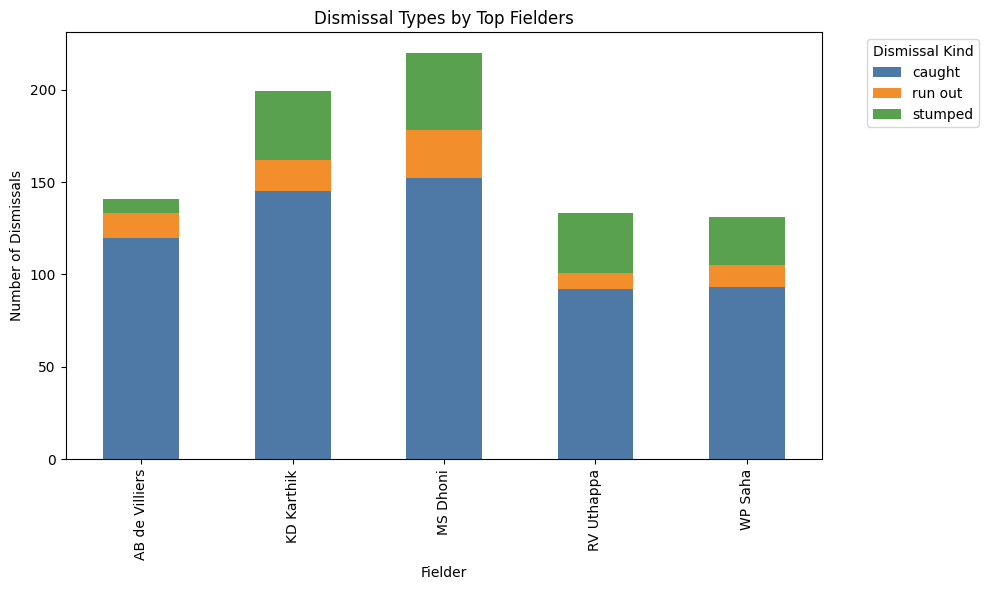

In [206]:

# Define visually distinct and colorblind-friendly colors for dismissal kinds
colors = {
    'caught': '#4E79A7',    # blue
    'run out': '#F28E2B',   # orange
    'stumped': '#59A14F'    # green
}

# Create pivot_df for top fielders and selected dismissal kinds
pivot_df = (
    fielder_positions_types[
        (fielder_positions_types['fielder'].isin(top_fielders)) &
        (fielder_positions_types['dismissal_kind'].isin(colors.keys()))
    ]
    .pivot(index='fielder', columns='dismissal_kind', values='dismissals')
    .fillna(0)
    .astype(int)
)

# Reorder columns to match color dict order
ordered_cols = [col for col in colors if col in pivot_df.columns]
pivot_df[ordered_cols].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[col] for col in ordered_cols]
)
plt.title('Dismissal Types by Top Fielders')
plt.xlabel('Fielder')
plt.ylabel('Number of Dismissals')
plt.legend(title='Dismissal Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
# loading the matches dataset
matches = pd.read_csv('matches.csv')
# checking the first 5 rows of the matches dataset
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.00,241.00,20.00,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.00,130.00,20.00,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.00,166.00,20.00,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.00,111.00,20.00,N,NaN,BF Bowden,K Hariharan


In [22]:
# check for info about the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [23]:
# check for number of rows and columns in the matches dataset
matches.shape

(1095, 20)

In [26]:
# print unique seasons in a visually appealing way
unique_seasons = matches['season'].unique()
print("IPL Seasons Available:\n" + "\n".join(f"• {season}" for season in unique_seasons))

IPL Seasons Available:
• 2007/08
• 2009
• 2009/10
• 2011
• 2012
• 2013
• 2014
• 2015
• 2016
• 2017
• 2018
• 2019
• 2020/21
• 2021
• 2022
• 2023
• 2024


That means we have data from 2007 to 2024 seasons


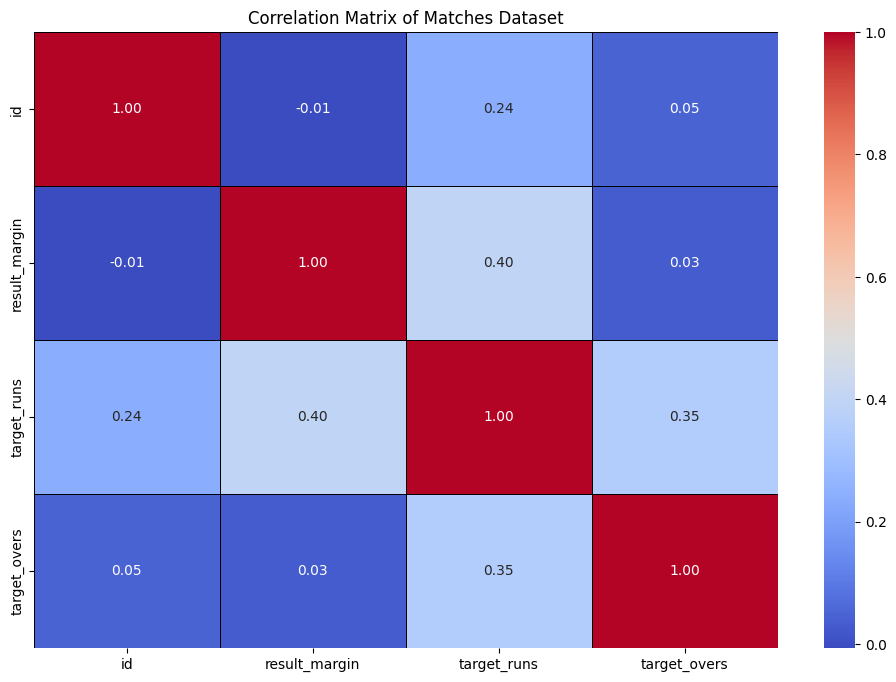

In [152]:
# checking the correlation matrix of the matches dataset
plt.figure(figsize=(12, 8))
sns.heatmap(
    matches.corr(numeric_only=True),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='black'   
)
plt.title('Correlation Matrix of Matches Dataset')
plt.show()

result margin and target runs shows some kind of relationship same moderate correlation can be scen between target runs and target overs.

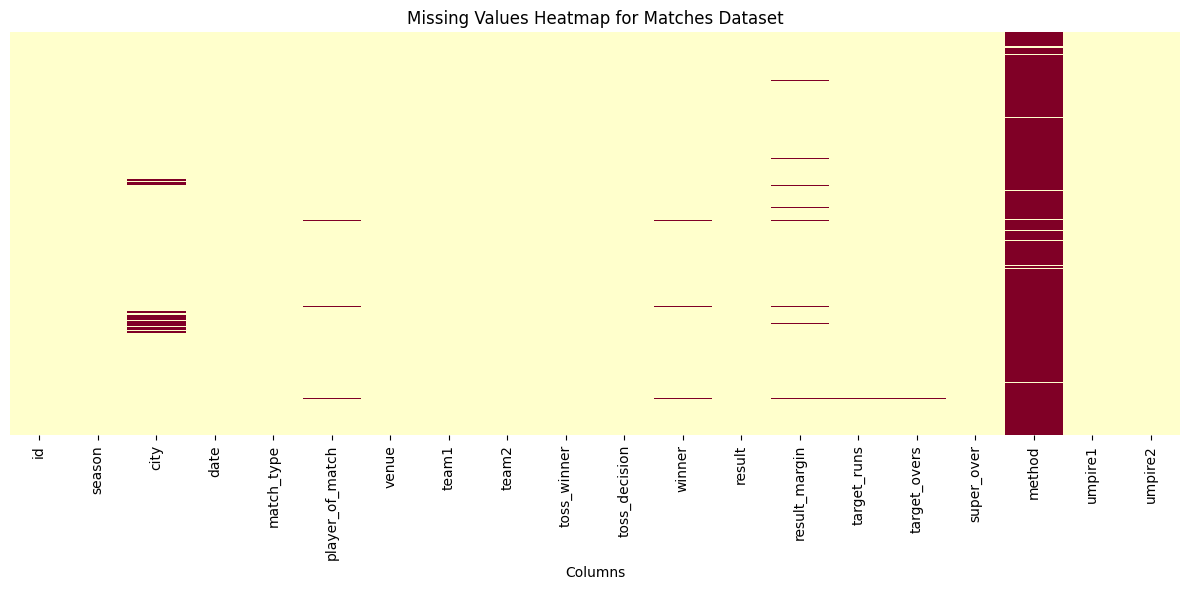

In [157]:
# Calculate missing percentage for matches dataset
missing_percentage_matches = (matches.isnull().sum() / len(matches)) * 100

# Visualize missing values in the matches dataset as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    matches.isnull(),
    cbar=False,
    cmap='YlOrRd',
    yticklabels=False
)
plt.title('Missing Values Heatmap for Matches Dataset')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()


In [145]:
# checking the count of matches
matches['id'].count()

1095

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\3362538763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


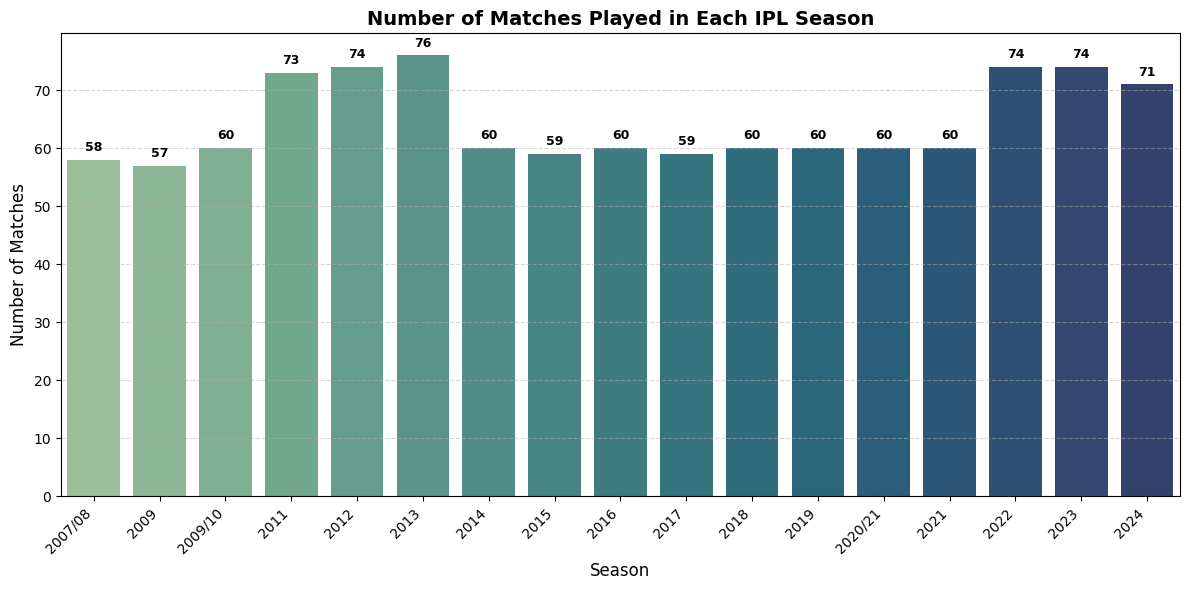

In [148]:
# Number of matches played in each season (optimized and visually appealing)
matches_per_season = matches['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_season.index,
    y=matches_per_season.values,
    palette='crest'
)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Number of Matches Played in Each IPL Season', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_season.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\3270218792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


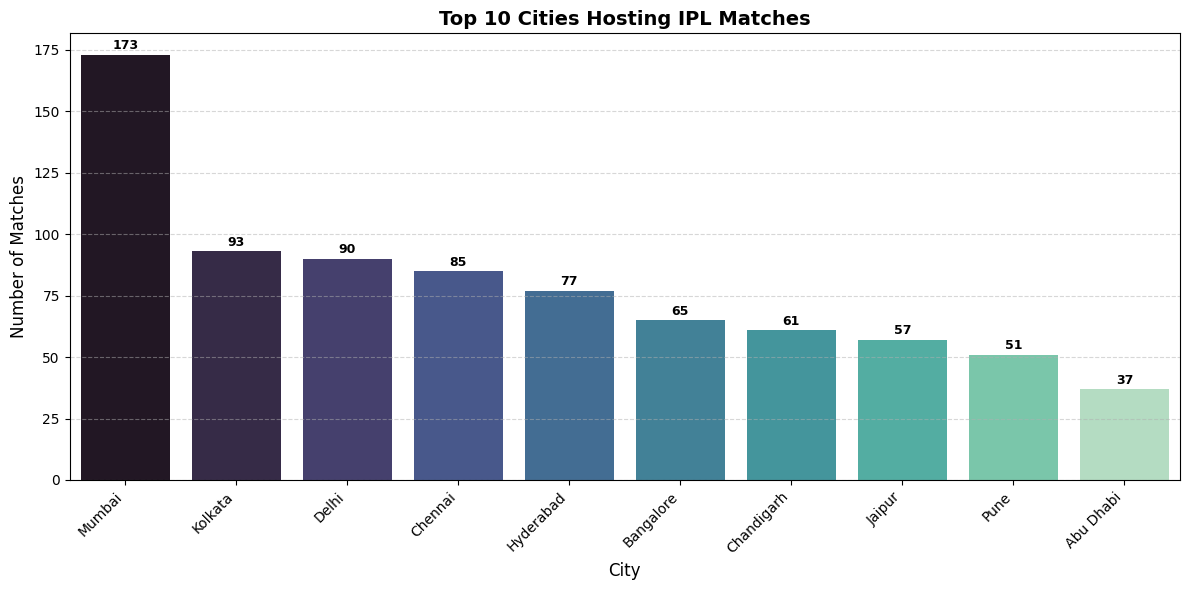

In [151]:
# which city host most matches
matches_per_city = matches['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=matches_per_city.index,
    y=matches_per_city.values,
    palette='mako'
)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Top 10 Cities Hosting IPL Matches', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(matches_per_city.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.show()


In [160]:
# how many cities hosted IPL matches
num_cities = matches['city'].nunique()
print(f'The number of cities that hosted IPL matches is: {num_cities}')

The number of cities that hosted IPL matches is: 36


In [161]:
# which city hosted the most matches
matches_per_city = matches['city'].value_counts().reset_index()
matches_per_city.columns = ['city', 'number_of_matches']
top_city = matches_per_city.iloc[0]
print(f'The city that hosted the most matches is {top_city["city"]} with {top_city["number_of_matches"]} matches.')


The city that hosted the most matches is Mumbai with 173 matches.


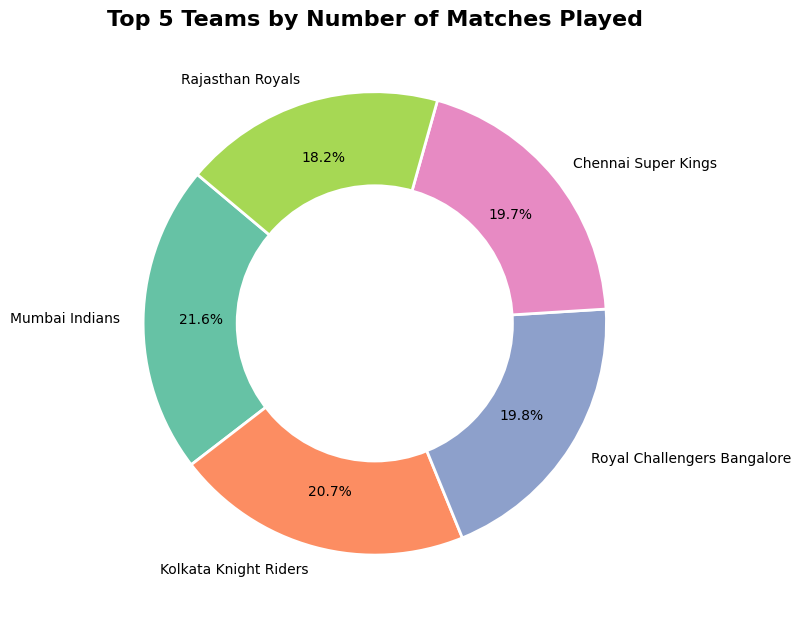

In [168]:
# Calculate matches played by each team if not already defined
matches_per_team = (
    pd.concat([
        matches['team1'],
        matches['team2']
    ])
    .value_counts()
    .reset_index()
)
matches_per_team.columns = ['team', 'number_of_matches']

# Get top 5 teams by number of matches played
top5_teams = matches_per_team.sort_values(by='number_of_matches', ascending=False).head(5)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top5_teams['number_of_matches'],
    labels=top5_teams['team'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', n_colors=5),
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    pctdistance=0.75  # Move percentage labels closer to the edge
)
# Draw a white circle at the center to make it a donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 5 Teams by Number of Matches Played', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [169]:
# which team has won least matches
least_wins_team = matches['winner'].value_counts().idxmin()
least_wins_count = matches['winner'].value_counts().min()
print(f'The team with the least wins is {least_wins_team} with {least_wins_count} wins.')

The team with the least wins is Rising Pune Supergiants with 5 wins.


In [172]:
# check unique vaalues in match_type column
match_types = matches['match_type'].unique()
print("Unique values in 'match_type' column:")
for match_type in match_types:
    print(f"• {match_type}")

Unique values in 'match_type' column:
• League
• Semi Final
• Final
• 3rd Place Play-Off
• Qualifier 1
• Elimination Final
• Qualifier 2
• Eliminator


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\1534381365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


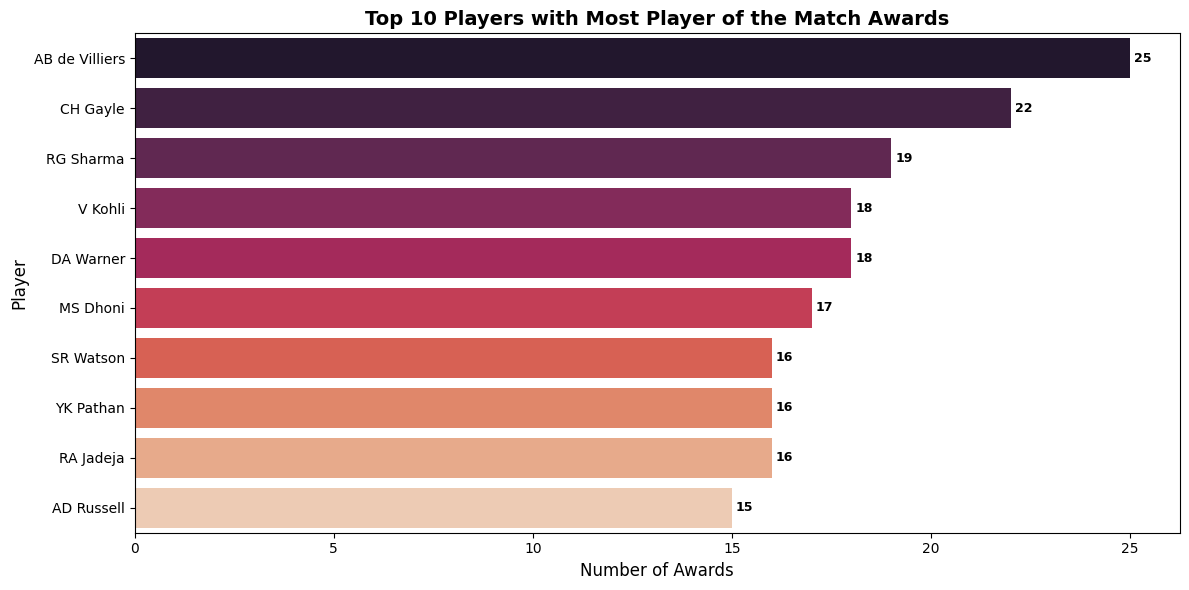

In [174]:
# which player won most player of the match awards
player_of_the_match = matches['player_of_match'].value_counts().reset_index()
player_of_the_match.columns = ['player', 'awards']
top_player_of_the_match = player_of_the_match.sort_values(by='awards', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_player_of_the_match['awards'],
    y=top_player_of_the_match['player'],
    palette='rocket'
)
plt.xlabel('Number of Awards', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.title('Top 10 Players with Most Player of the Match Awards', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
for i, v in enumerate(top_player_of_the_match['awards']):
    plt.text(v + 0.1, i, str(v), va='center', fontsize=9, fontweight='bold')
plt.show()


In [179]:
# Show which team won in which season
season_winners = matches[matches['match_type'] == 'Final'][['season', 'winner']]
print(season_winners.reset_index(drop=True))


     season                 winner
0   2007/08       Rajasthan Royals
1      2009        Deccan Chargers
2   2009/10    Chennai Super Kings
3      2011    Chennai Super Kings
4      2012  Kolkata Knight Riders
5      2013         Mumbai Indians
6      2014  Kolkata Knight Riders
7      2015         Mumbai Indians
8      2016    Sunrisers Hyderabad
9      2017         Mumbai Indians
10     2018    Chennai Super Kings
11     2019         Mumbai Indians
12  2020/21         Mumbai Indians
13     2021    Chennai Super Kings
14     2022         Gujarat Titans
15     2023    Chennai Super Kings
16     2024  Kolkata Knight Riders


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\1652834225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


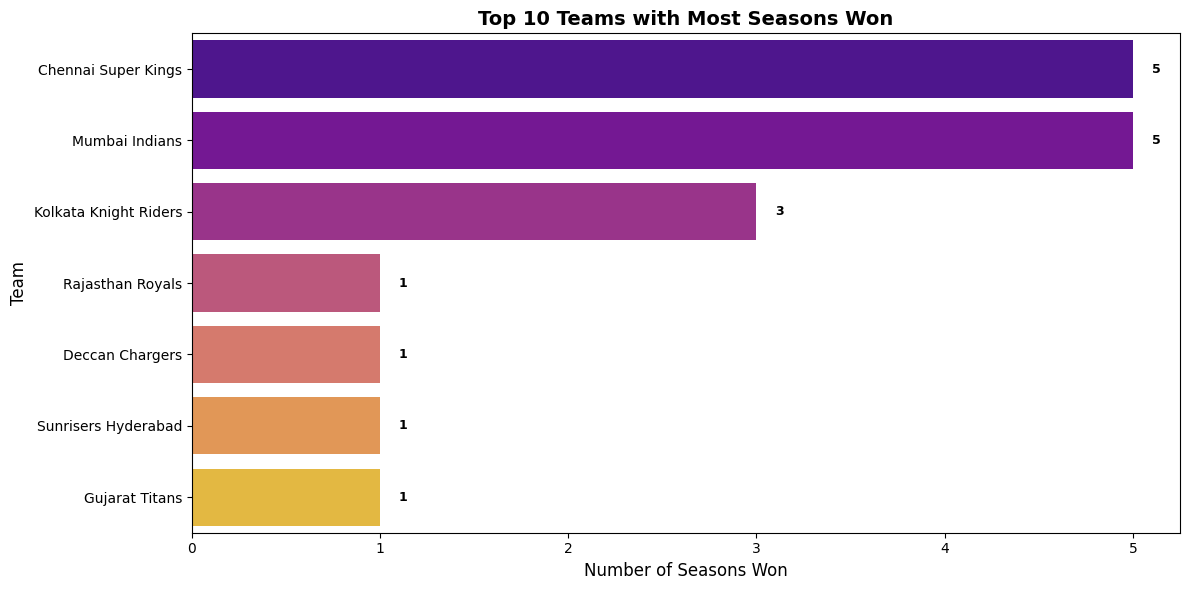

In [180]:
# which team has won most seasons
season_wins = season_winners['winner'].value_counts().reset_index()
season_wins.columns = ['team', 'number_of_seasons_won']
top_season_winner = season_wins.sort_values(by='number_of_seasons_won', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_season_winner['number_of_seasons_won'],
    y=top_season_winner['team'],
    palette='plasma'
)
plt.xlabel('Number of Seasons Won', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.title('Top 10 Teams with Most Seasons Won', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
for i, v in enumerate(top_season_winner['number_of_seasons_won']):
    plt.text(v + 0.1, i, str(v), va='center', fontsize=9, fontweight='bold')
plt.show()

In [177]:
# checking the summary statistics of target runs
matches['target_runs'].describe()


count   1,092.00
mean      165.68
std        33.43
min        43.00
25%       146.00
50%       166.00
75%       187.00
max       288.00
Name: target_runs, dtype: float64

On an vaerage target runs are 165 where as the maximum are 288.

In [181]:
matches.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
# team with highest target runs
highest_target_team = matches.loc[matches['target_runs'].idxmax(), ['team1', 'team2']]
highest_target_runs = matches['target_runs'].max()
print(f'The team with the highest target runs is {highest_target_team["team1"]} vs {highest_target_team["team2"]} with {highest_target_runs} runs. \n')
# team with lowest target runs
lowest_target_team = matches.loc[matches['target_runs'].idxmin(), ['team1', 'team2']]
lowest_target_runs = matches['target_runs'].min()
print(f'The team with the lowest target runs is {lowest_target_team["team1"]} vs {lowest_target_team["team2"]} with {lowest_target_runs} runs.')

The team with the highest target runs is Sunrisers Hyderabad vs Royal Challengers Bengaluru with 288.0 runs. 

The team with the lowest target runs is Delhi Daredevils vs Sunrisers Hyderabad with 43.0 runs.


In [189]:
# which team has made the highest win margin (by runs or wickets) in IPL history
highest_score_team = matches.loc[matches['result_margin'].idxmax(), ['team1', 'team2']]
highest_score_runs = matches['result_margin'].max()
print(f'The match with the highest win margin in IPL history is {highest_score_team["team1"]} vs {highest_score_team["team2"]} with a margin of {highest_score_runs}.\n')

# which team has the lowest win margin (excluding 0)
lowest_margin = matches['result_margin'][matches['result_margin'] > 0].min()
lowest_score_team = matches.loc[matches['result_margin'] == lowest_margin, ['team1', 'team2']].iloc[0]
print(f'The match with the lowest win margin in IPL history is {lowest_score_team["team1"]} vs {lowest_score_team["team2"]} with a margin of {lowest_margin}.')

The match with the highest win margin in IPL history is Delhi Daredevils vs Mumbai Indians with a margin of 146.0.

The match with the lowest win margin in IPL history is Mumbai Indians vs Kings XI Punjab with a margin of 1.0.


In [191]:
# stats for super overs
matches['super_over'].describe()


count     1095
unique       2
top          N
freq      1081
Name: super_over, dtype: object

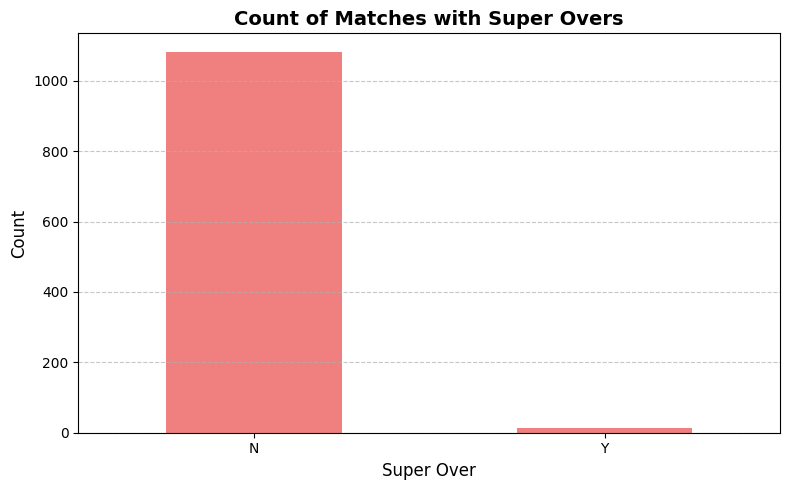

In [193]:
matches['super_over'].value_counts().plot(
    kind='bar',
    figsize=(8, 5),
    color='lightcoral'
)
plt.xlabel('Super Over', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Matches with Super Overs', fontsize=14, weight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
  

In [ ]:
# Find matches with super overs
super_over_matches = matches[matches['super_over'] == 'Y']

# Find the match with the highest and lowest super over scores
if not super_over_matches.empty:
	highest_super_over_idx = super_over_matches['target_runs'].idxmax()
	highest_super_over_team = matches.loc[highest_super_over_idx, ['team1', 'team2']]
	highest_super_over_runs = matches.loc[highest_super_over_idx, 'target_runs']
	highest_super_over_season = matches.loc[highest_super_over_idx, 'season']

	lowest_super_over_idx = super_over_matches['target_runs'].idxmin()
	lowest_super_over_team = matches.loc[lowest_super_over_idx, ['team1', 'team2']]
	lowest_super_over_runs = matches.loc[lowest_super_over_idx, 'target_runs']
	lowest_super_over_season = matches.loc[lowest_super_over_idx, 'season']

	print(f"The team with the highest score in super overs is {highest_super_over_team['team1']} vs {highest_super_over_team['team2']} with {highest_super_over_runs} runs in season {highest_super_over_season}. \n")
	print(f"The team with the lowest score in super overs is {lowest_super_over_team['team1']} vs {lowest_super_over_team['team2']} with {lowest_super_over_runs} runs in season {lowest_super_over_season}.")


The team with the highest score in super overs is Royal Challengers Bangalore vs Mumbai Indians with 202.0 runs in season 2020/21. 

The team with the lowest score in super overs is Sunrisers Hyderabad vs Royal Challengers Bangalore with 131.0 runs in season 2013.


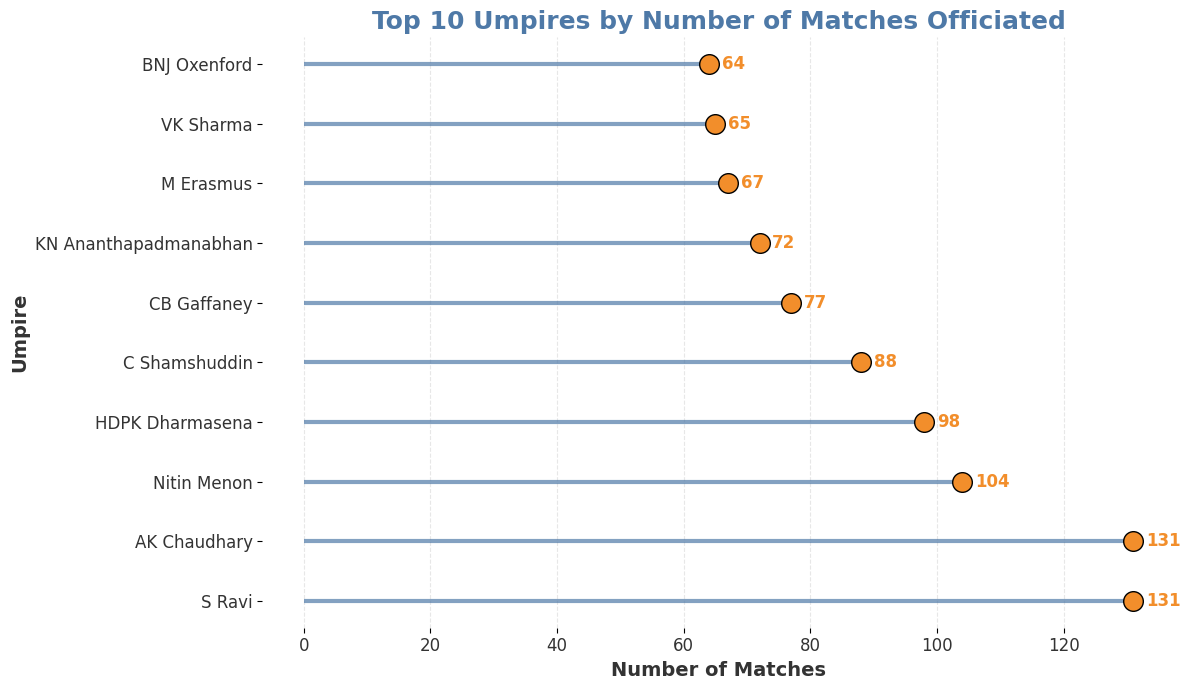

In [207]:
# Calculate top 10 umpires by number of matches officiated
umpire_counts = (
    pd.concat([matches['umpire1'], matches['umpire2']])
    .value_counts()
    .reset_index()
)
umpire_counts.columns = ['umpire', 'number_of_matches']
top_umpires = umpire_counts.head(10)

# Visualize top 10 umpires by number of matches officiated using a beautiful horizontal lollipop chart
plt.figure(figsize=(12, 7))
plt.hlines(
    y=top_umpires['umpire'],
    xmin=0,
    xmax=top_umpires['number_of_matches'],
    color='#4E79A7',
    linewidth=3,
    alpha=0.7
)
plt.scatter(
    top_umpires['number_of_matches'],
    top_umpires['umpire'],
    color='#F28E2B',
    s=200,
    edgecolor='black',
    zorder=3
)
plt.xlabel('Number of Matches', fontsize=14, weight='bold', color='#333333')
plt.ylabel('Umpire', fontsize=14, weight='bold', color='#333333')
plt.title('Top 10 Umpires by Number of Matches Officiated', fontsize=18, weight='bold', color='#4E79A7')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.grid(axis='x', linestyle='--', alpha=0.3)
for i, (v, umpire) in enumerate(zip(top_umpires['number_of_matches'], top_umpires['umpire'])):
    plt.text(v + 2, umpire, str(v), va='center', fontsize=12, fontweight='bold', color='#F28E2B')
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

## Data Cleaning

In [ ]:
#finding null values in City column
matches[matches['city'].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.00,146.00,20.00,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.00,116.00,20.00,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.00,167.00,20.00,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.00,192.00,20.00,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.00,194.00,20.00,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.00,141.00,20.00,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.00,151.00,20.00,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.00,185.00,20.00,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.00,142.00,20.00,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.00,126.00,20.00,N,NaN,Aleem Dar,VA Kulkarni


In [209]:
#Handling null values in winner column
matches.loc[matches.winner.isna(),'winner'] = 'No_Winner'


In [210]:
matches.loc[matches['result'].isna() , 'winner'] = 'No winner'


In [211]:
#Now we will replace team name that are mentioned wrong
matches.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)


In [212]:
matches.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)


In [213]:
matches.team1.value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Pune Warriors                   37
Punjab Kings                    31
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [214]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [215]:

#Now we will drop method column bcz it have many null values and we can ignore it.
matches.drop('method', axis=1, inplace=True)

In [216]:

#Here we handle null values in result , result_margin & eliminator column
matches.loc[matches['result'].isna() , 'result'] = 'No Result'

In [217]:
matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\3422985037.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Margin' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'


In [219]:
if 'eliminator' in matches.columns:
	matches.loc[matches['eliminator'].isna(), 'eliminator'] = 'N'
else:
	matches['eliminator'] = 'N'


In [221]:
# Here we will find various features of each team like total matches, won matches, and win percentage
matches_played = pd.concat([matches['team1'], matches['team2']], axis=0)
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Teams', 'Total Matches Played']

# Calculate number of matches won by each team
wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Teams', 'Wins']

# Merge total matches played and wins
matches_played = matches_played.merge(wins, on='Teams', how='left')
matches_played['Wins'] = matches_played['Wins'].fillna(0).astype(int)

# Calculate win percentage
matches_played['Win Percentage'] = matches_played['Wins'] / matches_played['Total Matches Played'] * 100

matches_played


,Teams,Total Matches Played,Wins,Win Percentage
0,Mumbai Indians,261,144,55.17
1,Kolkata Knight Riders,251,131,52.19
2,Royal Challengers Bangalore,240,116,48.33
3,Chennai Super Kings,238,138,57.98
4,Rajasthan Royals,221,112,50.68
5,Kings XI Punjab,190,88,46.32
6,Sunrisers Hyderabad,182,88,48.35
7,Delhi Daredevils,161,67,41.61
8,Delhi Capitals,91,48,52.75
9,Pune Warriors,76,27,35.53


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\2334249569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\2334249569.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\2334249569.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\2334249569.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

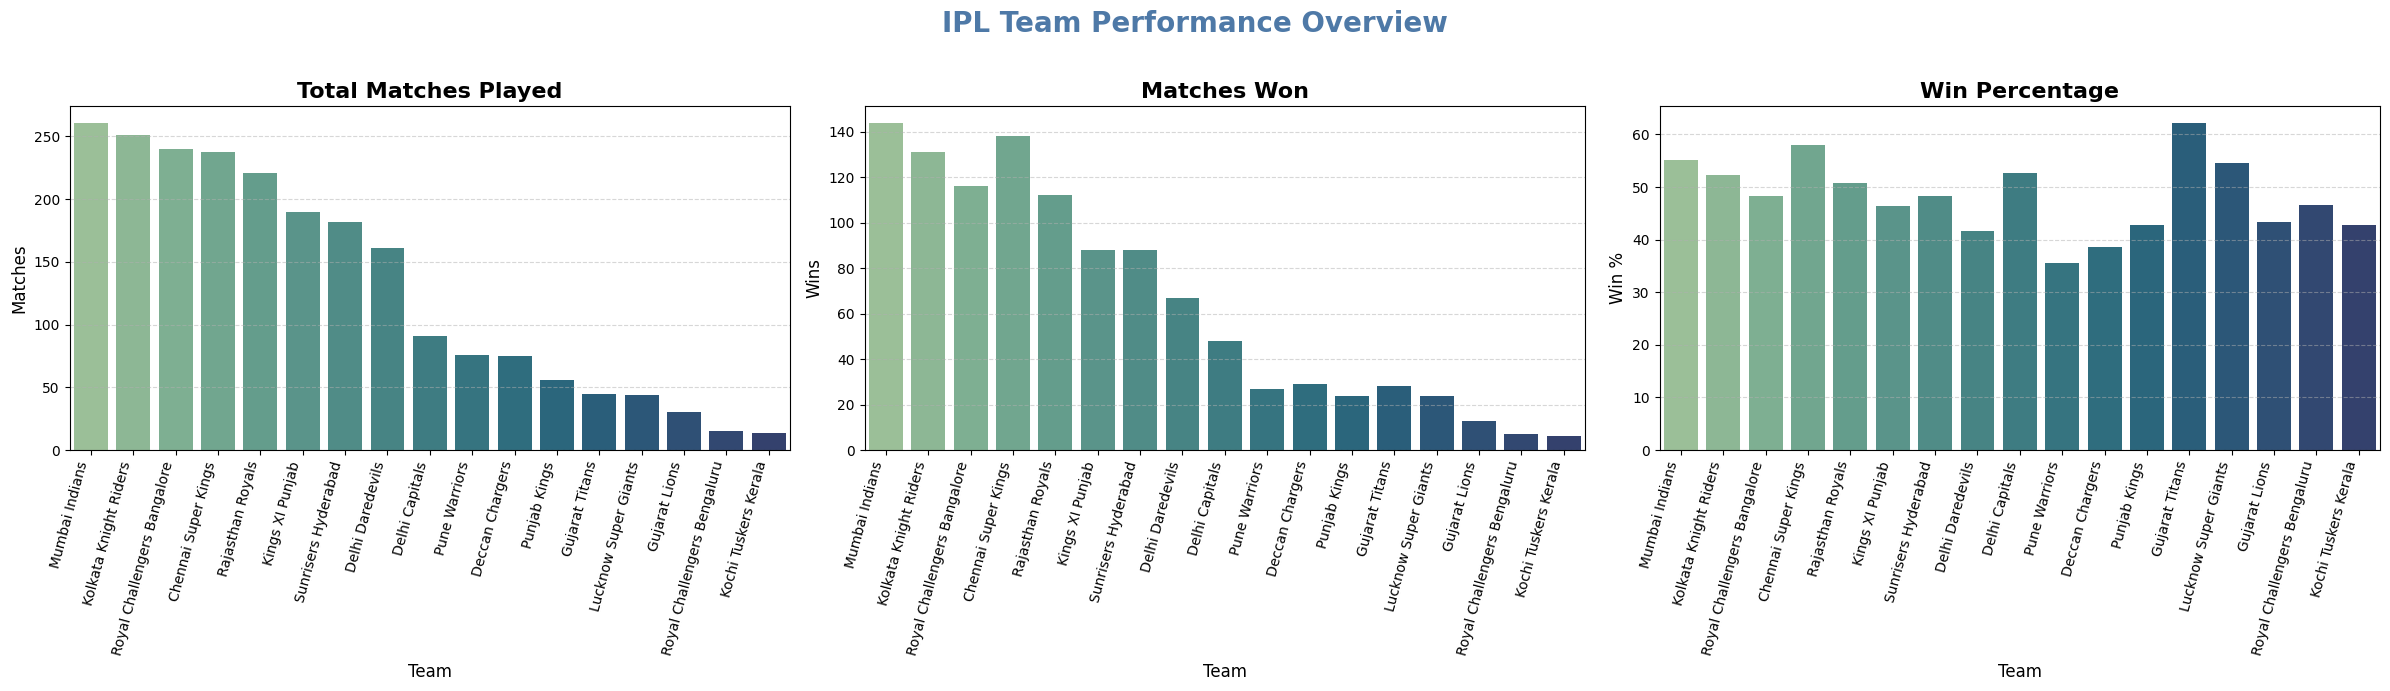

In [224]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7))
bar_colors = sns.color_palette('crest', n_colors=len(matches_played))

# Total Matches Played
sns.barplot(
    x='Teams', y='Total Matches Played', data=matches_played,
    ax=axes[0], palette=bar_colors
)
axes[0].set_title('Total Matches Played', fontsize=16, weight='bold')
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Matches', fontsize=12)
axes[0].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Matches Won
sns.barplot(
    x='Teams', y='Wins', data=matches_played,
    ax=axes[1], palette=bar_colors
)
axes[1].set_title('Matches Won', fontsize=16, weight='bold')
axes[1].set_xlabel('Team', fontsize=12)
axes[1].set_ylabel('Wins', fontsize=12)
axes[1].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Win Percentage
sns.barplot(
    x='Teams', y='Win Percentage', data=matches_played,
    ax=axes[2], palette=bar_colors
)
axes[2].set_title('Win Percentage', fontsize=16, weight='bold')
axes[2].set_xlabel('Team', fontsize=12)
axes[2].set_ylabel('Win %', fontsize=12)
axes[2].set_xticklabels(matches_played['Teams'], rotation=75, ha='right', fontsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle('IPL Team Performance Overview', fontsize=20, weight='bold', color='#4E79A7')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\486373631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


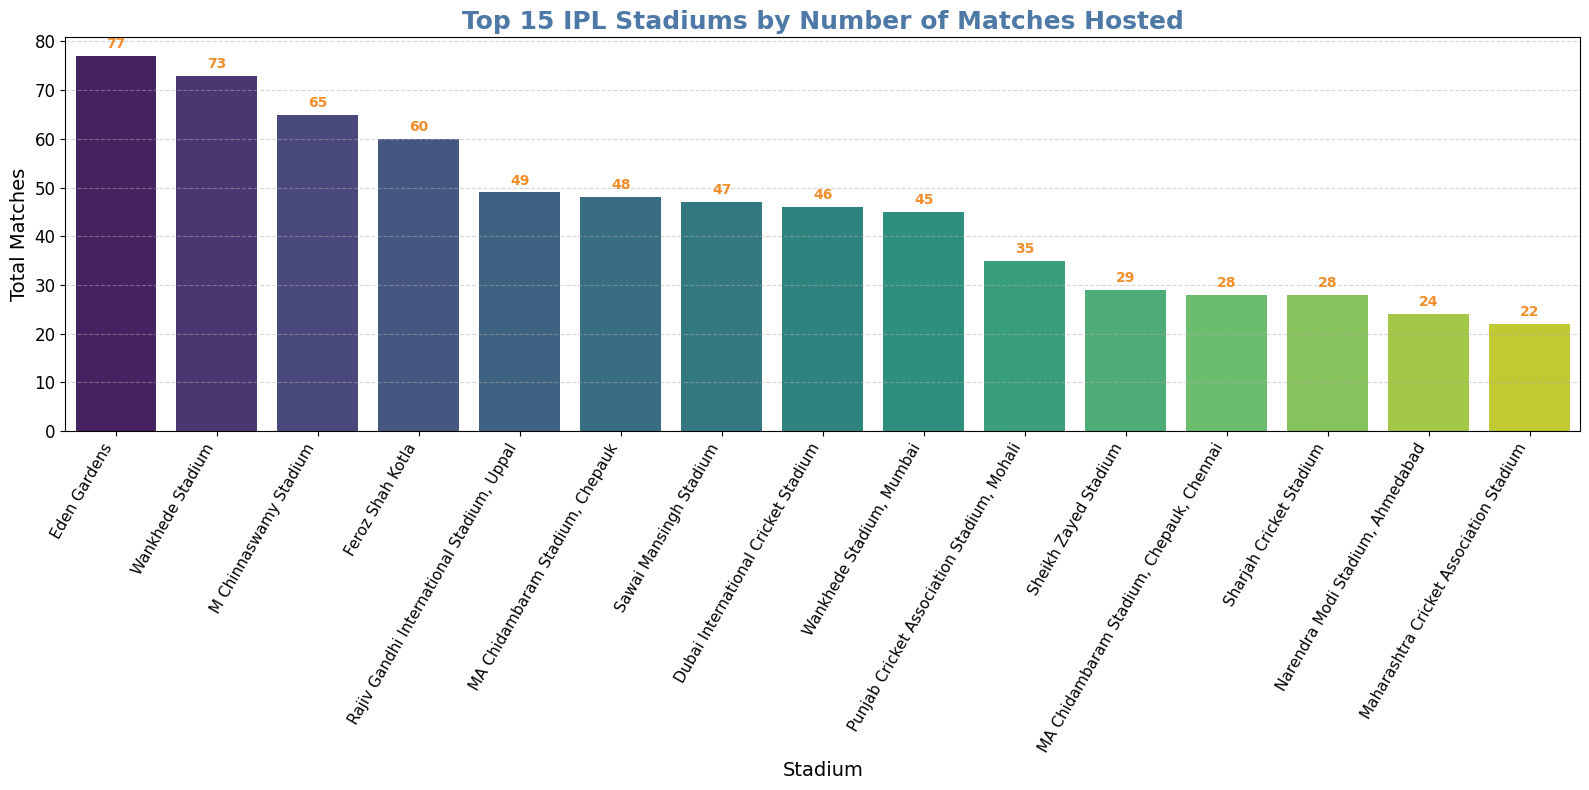

In [226]:
# Find top 15 stadiums by total matches for better visualization
top_stadiums = stadium_matches.sort_values(by='Total Matches', ascending=False).head(15)

plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    x='Stadium',
    y='Total Matches',
    data=top_stadiums,
    palette='viridis'
)
plt.title('Top 15 IPL Stadiums by Number of Matches Hosted', fontsize=18, weight='bold', color='#4E79A7')
plt.xlabel('Stadium', fontsize=14)
plt.ylabel('Total Matches', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(top_stadiums['Total Matches']):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold', color='#F28E2B')
plt.tight_layout()
plt.show()


C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\3059162522.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({
C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\3059162522.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


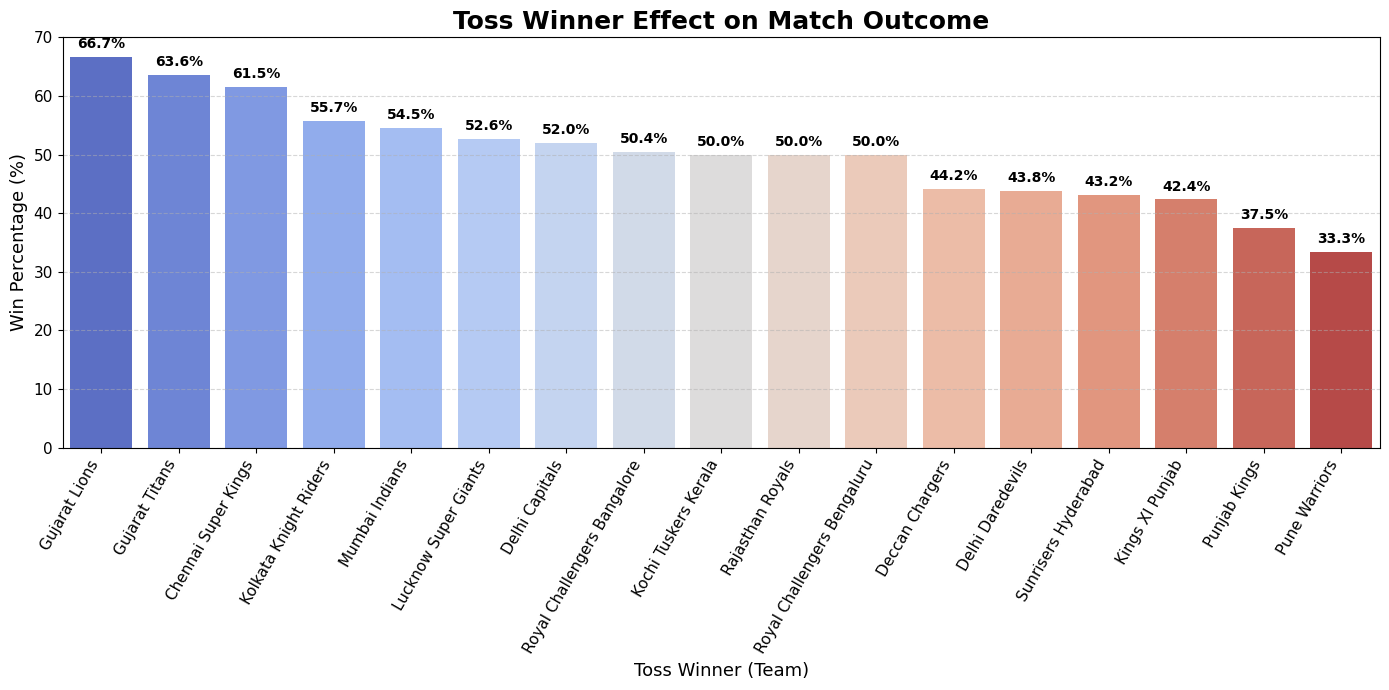

In [230]:
# Calculate toss winner stats if not already defined
toss_winner_stats = (
    matches.groupby('toss_winner')
    .apply(lambda x: pd.Series({
        'TossWinAndMatchWin': (x['toss_winner'] == x['winner']).sum(),
        'Total Matches': len(x)
    }))
    .reset_index()
)
toss_winner_stats['Win Percentage'] = toss_winner_stats['TossWinAndMatchWin'] / toss_winner_stats['Total Matches'] * 100

# Sort by Win Percentage for better readability
toss_winner_stats_sorted = toss_winner_stats.sort_values(by='Win Percentage', ascending=False)

plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x='toss_winner',
    y='Win Percentage',
    data=toss_winner_stats_sorted,
    palette='coolwarm'
)
plt.title('Toss Winner Effect on Match Outcome', fontsize=18, weight='bold')
plt.xlabel('Toss Winner (Team)', fontsize=13)
plt.ylabel('Win Percentage (%)', fontsize=13)
plt.xticks(rotation=60, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with win percentage values
for i, v in enumerate(toss_winner_stats_sorted['Win Percentage']):
    barplot.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\719949619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


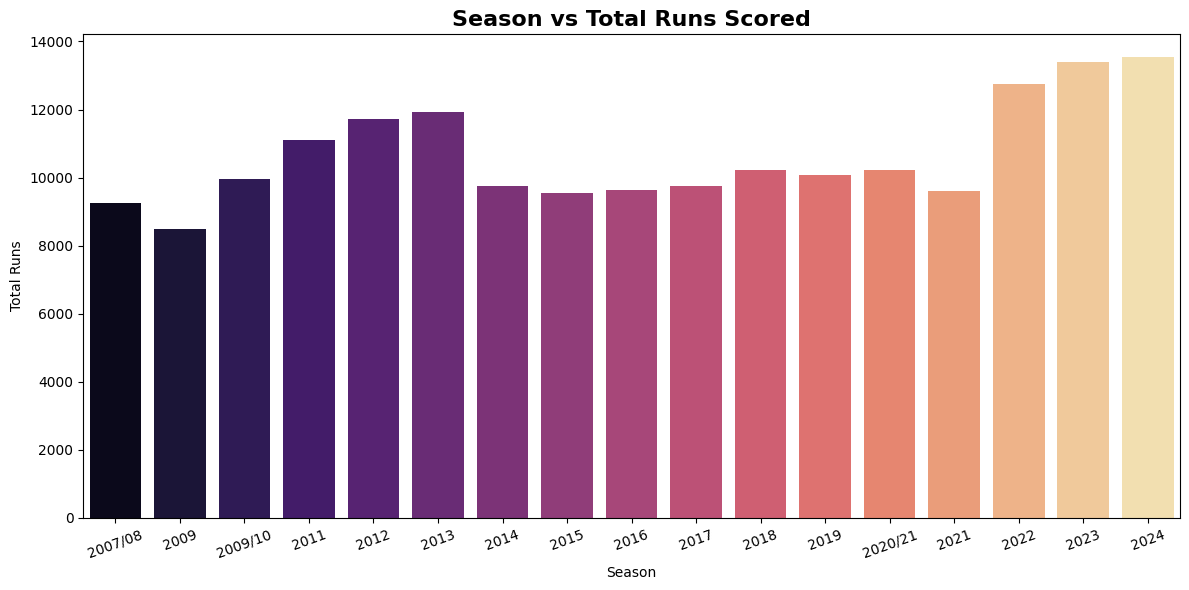

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\719949619.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


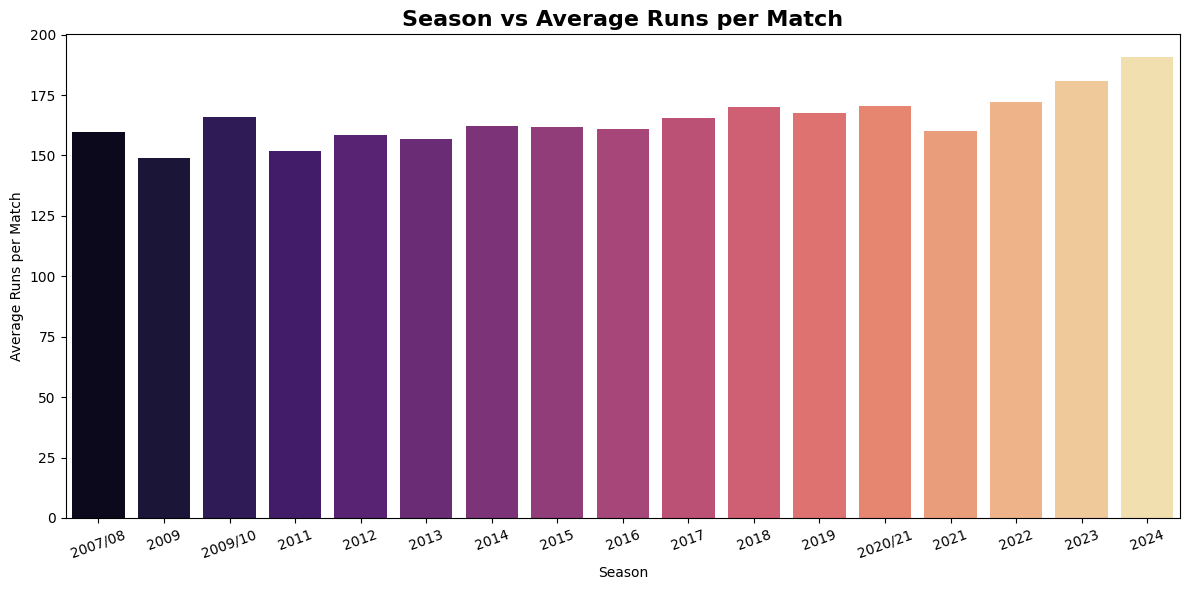

In [235]:
# Create matches_season DataFrame if not already defined
if 'matches_season' not in globals():
    # Calculate total runs per season from deliveries
    runs_per_season = deliveries.groupby('season')['total_runs'].sum().reset_index()
    # Calculate total matches per season from matches
    matches_per_season = matches['season'].value_counts().sort_index().reset_index()
    matches_per_season.columns = ['season', 'total_matches']
    # Merge and calculate average runs per match
    matches_season = pd.merge(runs_per_season, matches_per_season, on='season')
    matches_season['average_runs_per_match'] = matches_season['total_runs'] / matches_season['total_matches']

# Plot: Season vs Total Runs Scored
plt.figure(figsize=(12, 6))
sns.barplot(
    x='season', y='total_runs', data=matches_season, palette='magma'
)
plt.xticks(rotation=20)
plt.title('Season vs Total Runs Scored', fontsize=16, weight='bold')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

# Plot: Season vs Average Runs per Match
plt.figure(figsize=(12, 6))
sns.barplot(
    x='season', y='average_runs_per_match', data=matches_season, palette='magma'
)
plt.xticks(rotation=20)
plt.title('Season vs Average Runs per Match', fontsize=16, weight='bold')
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.tight_layout()
plt.show()


In [237]:
# combine both deliveries and matches datasets
df = pd.merge(deliveries, matches, left_on='match_id', right_on='id', suffixes=('_delivery', '_match'))

# to show all columns in the combined dataset
pd.set_option('display.max_columns', None)

# Check the first few rows of the combined dataset
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,eliminator
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.00,223.00,20.00,N,Asad Rauf,RE Koertzen,N


In [239]:
# checking unique values in `inning` column
innings_unique = df['inning'].unique()
print("Unique values in 'inning' column:")
print(innings_unique)

Unique values in 'inning' column:
[1 2 3 4 5 6]


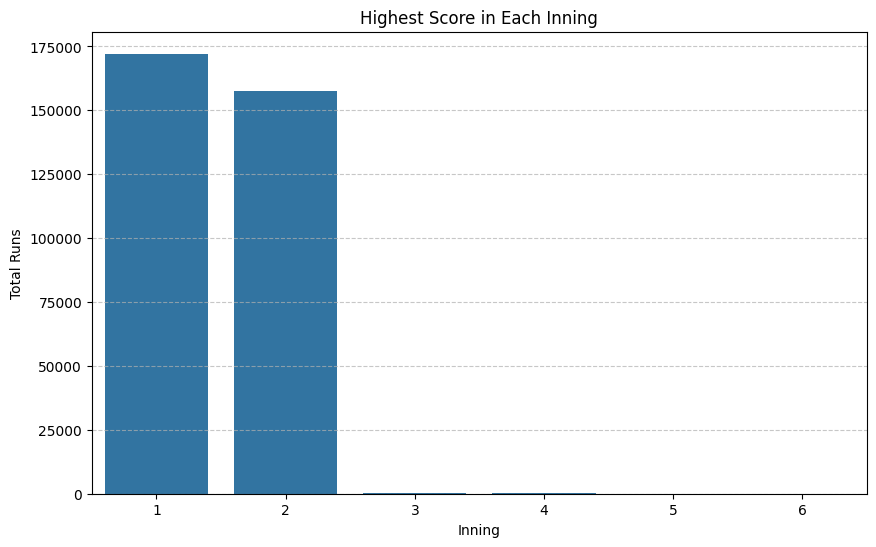

In [241]:
# highest score in each inning
highest_scores = df.groupby('inning')['batsman_runs'].sum().reset_index()
highest_scores.columns = ['Inning', 'Total Runs']
plt.figure(figsize=(10, 6))
sns.barplot(x='Inning', y='Total Runs', data=highest_scores)
plt.title('Highest Score in Each Inning')
plt.xlabel('Inning')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\2331473509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Inning', y='Overs Bowled', data=overs_per_inning, palette='viridis')


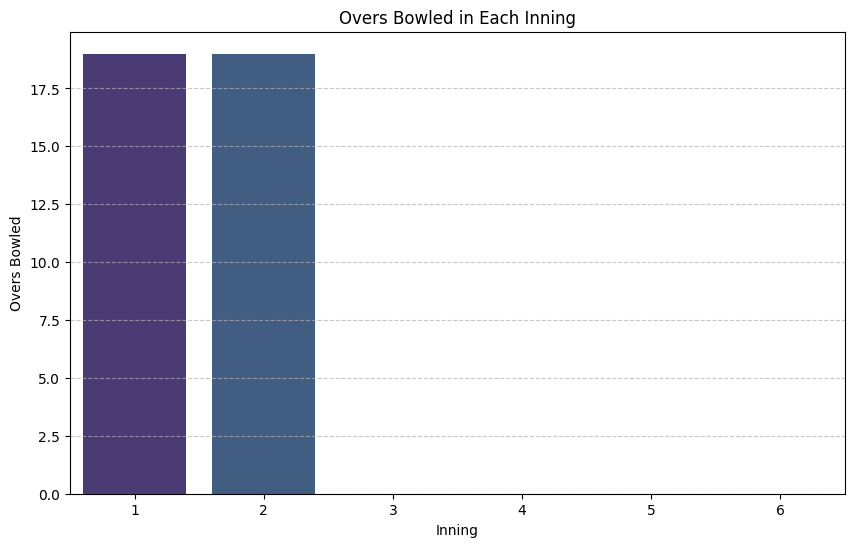

In [242]:
# how many overs were bowled in each inning
overs_per_inning = df.groupby('inning')['over'].max().reset_index()
overs_per_inning.columns = ['Inning', 'Overs Bowled']
plt.figure(figsize=(10, 6))
sns.barplot(x='Inning', y='Overs Bowled', data=overs_per_inning, palette='viridis')
plt.title('Overs Bowled in Each Inning')
plt.xlabel('Inning')
plt.ylabel('Overs Bowled')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [247]:
# Highest first inning score in each season, sorted by total runs descending
first_inning_season = (
    df[df['inning'] == 1]
    .groupby(['season', 'team1'])['batsman_runs'].sum()
    .reset_index()
)
first_inning_max = first_inning_season.loc[first_inning_season.groupby('season')['batsman_runs'].idxmax()]
first_inning_max = first_inning_max.rename(columns={'team1': 'Team', 'batsman_runs': 'Total Runs'})
first_inning_max = first_inning_max.sort_values(by='Total Runs', ascending=False)
print("Highest first inning score in each season (sorted by total runs):")
print(first_inning_max)

Highest first inning score in each season (sorted by total runs):
      season                         Team  Total Runs
14      2009  Royal Challengers Bangalore        2293
122     2022             Rajasthan Royals        2176
144     2024          Sunrisers Hyderabad        1895
100  2020/21               Delhi Capitals        1803
107     2021          Chennai Super Kings        1713
125     2023          Chennai Super Kings        1684
42      2013          Chennai Super Kings        1645
35      2012             Delhi Daredevils        1630
95      2019               Mumbai Indians        1588
84      2018             Delhi Daredevils        1559
73      2016  Royal Challengers Bangalore        1552
15   2009/10          Chennai Super Kings        1521
79      2017               Mumbai Indians        1517
51      2014          Chennai Super Kings        1475
63      2015               Mumbai Indians        1405
0    2007/08          Chennai Super Kings        1381
23      2011    

In [249]:
# Calculate highest second inning score in each season if not already defined
second_inning_season = (
	df[df['inning'] == 2]
	.groupby(['season', 'team2'])['batsman_runs'].sum()
	.reset_index()
)
second_inning_max = second_inning_season.loc[second_inning_season.groupby('season')['batsman_runs'].idxmax()]
second_inning_max = second_inning_max.rename(columns={'team2': 'Team', 'batsman_runs': 'Total Runs'})

# Sort by Total Runs in descending order
second_inning_max_sorted = second_inning_max.sort_values(by='Total Runs', ascending=False)
print("\nHighest second inning score in each season (sorted by total runs):")
print(second_inning_max_sorted)



Highest second inning score in each season (sorted by total runs):
      season                         Team  Total Runs
130     2023               Mumbai Indians        1809
141     2024                 Punjab Kings        1723
83      2018          Chennai Super Kings        1622
124     2022          Sunrisers Hyderabad        1574
53      2014              Kings XI Punjab        1544
99   2020/21          Chennai Super Kings        1536
13      2009               Mumbai Indians        1509
109     2021        Kolkata Knight Riders        1498
92      2019               Delhi Capitals        1480
20   2009/10               Mumbai Indians        1327
74      2016          Sunrisers Hyderabad        1322
46      2013               Mumbai Indians        1300
6    2007/08             Rajasthan Royals        1300
80      2017                Pune Warriors        1285
38      2012               Mumbai Indians        1284
59      2015          Chennai Super Kings        1206
32      2011  

In [254]:
# Define a function to get batsman statistics
def get_batsman_statistics(player, df):
	player_df = df[df['batter'] == player]
	total_runs = player_df['batsman_runs'].sum()
	balls_faced = player_df.shape[0]
	total_fours = (player_df['batsman_runs'] == 4).sum()
	total_sixes = (player_df['batsman_runs'] == 6).sum()
	highest_score = player_df.groupby(['match_id'])['batsman_runs'].sum().max()
	# Calculate dismissals for batting average
	outs = player_df['is_wicket'].sum()
	batting_average = total_runs / outs if outs > 0 else float('nan')
	strike_rate = (total_runs / balls_faced) * 100 if balls_faced > 0 else 0
	return {
		"player_name": player,
		"total_runs": total_runs,
		"batting_average": batting_average,
		"strike_rate": strike_rate,
		"total_fours": total_fours,
		"total_sixes": total_sixes,
		"highest_score": highest_score
	}

# Get total runs for each player
batsman_totals = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)

# Select top 10 batsmen
top_10_batsmen = batsman_totals.head(10).index.tolist()

# Get stats for each player
batsman_stats = [get_batsman_statistics(player, df) for player in top_10_batsmen]

# Convert to DataFrame for easy plotting
batsman_df = pd.DataFrame(batsman_stats)
batsman_df.set_index("player_name", inplace=True)
# Display the DataFrame with player name and total runs
batsman_df.reset_index()[['player_name', 'total_runs']]

,player_name,total_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


## Top 5 batsman comparison

In [255]:
batsman_df = batsman_df.head(5)


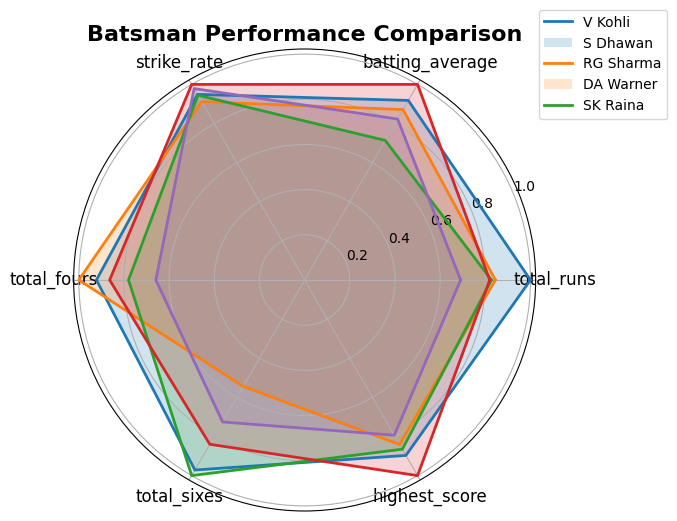

In [256]:
from math import pi

# Normalize data for better visualization
stats = ["total_runs", "batting_average", "strike_rate", "total_fours", "total_sixes", "highest_score"]
df_normalized = batsman_df[stats] / batsman_df[stats].max()  # Normalize values

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Define angles for each metric
angles = [n / float(len(stats)) * 2 * pi for n in range(len(stats))]
angles += angles[:1]  # Close the circle

# Plot each batsman
for player in batsman_df.index:
    values = df_normalized.loc[player].tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, linewidth=2, linestyle="solid", label=player)
    ax.fill(angles, values, alpha=0.2)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats, fontsize=12)
plt.title("Batsman Performance Comparison", fontsize=16, fontweight="bold")

# Add legend
plt.legend(batsman_df.index, loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()

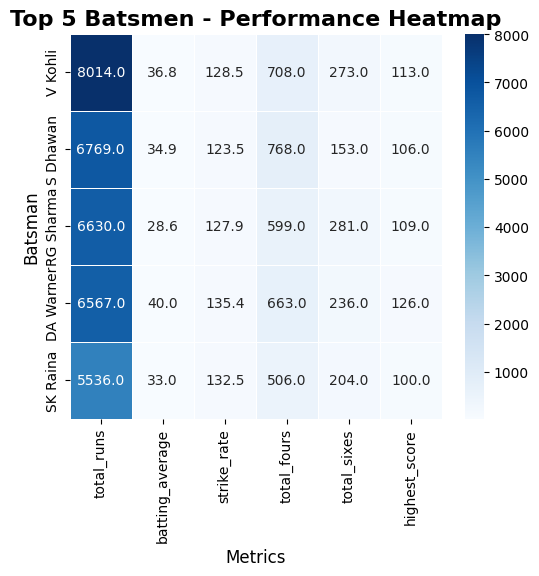

In [257]:
plt.figure(figsize=(6, 5))
sns.heatmap(batsman_df[stats], annot=True, cmap="Blues", linewidths=0.5, fmt=".1f")
plt.title("Top 5 Batsmen - Performance Heatmap", fontsize=16, fontweight="bold")
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.show()

C:\Users\Icon\AppData\Local\Temp\ipykernel_33948\750621184.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


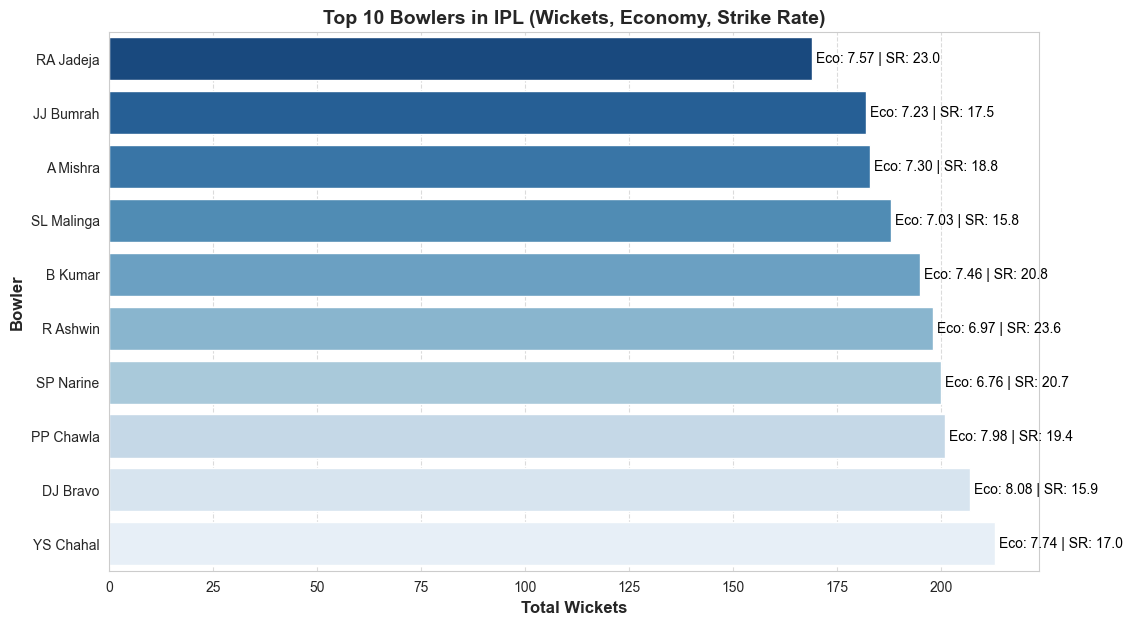

In [259]:
# Calculate total wickets for each bowler
bowler_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()
bowler_wickets.columns = ['bowler', 'total_wickets']

# Calculate total balls bowled by each bowler
bowler_balls = deliveries.groupby('bowler').size().reset_index(name='balls_bowled')

# Calculate total runs conceded by each bowler
bowler_runs = deliveries.groupby('bowler')['total_runs'].sum().reset_index()

# Merge all stats
bowler_stats = bowler_wickets.merge(bowler_balls, on='bowler').merge(bowler_runs, on='bowler')

# Calculate economy rate and strike rate
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / (bowler_stats['balls_bowled'] / 6)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['total_wickets']

# Get top 10 bowlers by wickets
top_10_bowlers = bowler_stats.sort_values(by='total_wickets', ascending=False).head(10)

# Sort bowlers by total wickets for plotting
top_10_bowlers_sorted = top_10_bowlers.sort_values(by="total_wickets", ascending=True)

# Set the style
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(
    y=top_10_bowlers_sorted["bowler"],
    x=top_10_bowlers_sorted["total_wickets"],
    palette="Blues_r"
)

# Add data labels (Economy & Strike Rate)
for index, value in enumerate(top_10_bowlers_sorted["total_wickets"]):
    eco_rate = top_10_bowlers_sorted.iloc[index]["economy_rate"]
    strike_rate = top_10_bowlers_sorted.iloc[index]["strike_rate"]
    
    plt.text(value + 1, index, f"Eco: {eco_rate:.2f} | SR: {strike_rate:.1f}", fontsize=10, color="black", va="center")

# Titles and labels
plt.xlabel("Total Wickets", fontsize=12, fontweight="bold")
plt.ylabel("Bowler", fontsize=12, fontweight="bold")
plt.title("Top 10 Bowlers in IPL (Wickets, Economy, Strike Rate)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Feature Engineering

In [280]:
# First, aggregate data to the over level
# We will calculate total runs scored in each over for each match
over_level_df = (
    deliveries
    .groupby(['match_id', 'inning', 'batting_team', 'bowling_team', 'over'])
    .agg(
        total_runs_over=('total_runs', 'sum'),
        balls=('ball', 'count'),
        unique_batters=('batter', pd.Series.nunique),
        unique_bowlers=('bowler', pd.Series.nunique)
    )
    .reset_index()
)

In [281]:
# Add features: over_bin (early, middle, death), run rate by inning+team, etc.

df = over_level_df.copy()

# Create over phase bins
def over_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 15:
        return 'Middle'
    else:
        return 'Death'

df['over_phase'] = df['over'].apply(over_phase)

In [283]:
# Compute average runs per over for each team + inning to simulate expected aggression
team_inning_rr = (
    df.groupby(['batting_team', 'inning'])['total_runs_over']
    .mean()
    .reset_index()
    .rename(columns={'total_runs_over': 'avg_runs_by_team_in_inning'})
)

In [284]:
# Merge back
df = df.merge(team_inning_rr, on=['batting_team', 'inning'], how='left')

In [286]:
# One-hot encode over_phase
df = pd.get_dummies(df, columns=['over_phase'])



## Runs Score Prediction Per Over

### Feature Extraction

In [287]:
# Define features and target
features_ext = [
    'inning', 'batting_team', 'bowling_team', 'over', 'balls',
    'unique_batters', 'unique_bowlers', 'avg_runs_by_team_in_inning',
    'over_phase_Death', 'over_phase_Middle', 'over_phase_Powerplay'
]
target = 'total_runs_over'

### Encoding

In [288]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[features_ext], columns=['batting_team', 'bowling_team'])
X = df_encoded
y = df[target]

### Train Test Split

In [289]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [291]:
from sklearn.ensemble import RandomForestRegressor

# Train new Random Forest with added features
rf_enhanced = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=42, n_jobs=-1)
rf_enhanced.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=50, n_jobs=-1, random_state=42)

### Random Forest Evaluation

In [297]:
# Evaluate
y_pred_enhanced = rf_enhanced.predict(X_test)
rand_forest = {
    "MAE": mean_absolute_error(y_test, y_pred_enhanced),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_enhanced)),
    "R²": r2_score(y_test, y_pred_enhanced)
}

print("Random Forest Performance on Test Set:")
for metric, value in rand_forest.items():
    if metric == "R²":
        print(f"{metric}: {value:.3f}")
    else:
        print(f"{metric}: {value:.2f}")


Random Forest Performance on Test Set:
MAE: 3.34
RMSE: 4.24
R²: 0.179


### Linear Regression Algorithm

In [296]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on test set
y_pred_linreg = linreg.predict(X_test)
linreg_metrics = {
    "MAE": mean_absolute_error(y_test, y_pred_linreg),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_linreg)),
    "R²": r2_score(y_test, y_pred_linreg)
}

print("Linear Regression Performance on Test Set:")
for metric, value in linreg_metrics.items():
    if metric == "R²":
        print(f"{metric}: {value:.3f}")
    else:
        print(f"{metric}: {value:.2f}")


Linear Regression Performance on Test Set:
MAE: 3.37
RMSE: 4.25
R²: 0.176


### XGBoost

In [298]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
xgb_metrics = {
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "R²": r2_score(y_test, y_pred_xgb)
}

print("XGBoost Performance on Test Set:")
for metric, value in xgb_metrics.items():
    if metric == "R²":
        print(f"{metric}: {value:.3f}")
    else:
        print(f"{metric}: {value:.2f}")


XGBoost Performance on Test Set:
MAE: 3.32
RMSE: 4.21
R²: 0.192
